<a href="https://colab.research.google.com/github/RecSys-lab/MoViFex/blob/main/examples/load_movifex_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MoViFex Framework - Process `MoViFex` Dataset Metadata**

🎬 Dataset MoViFex Dataset: [link](https://huggingface.co/datasets/alitourani/MoViFex_Dataset/tree/main)

🎬 Framework: [link](https://github.com/RecSys-lab/MoViFex)


# [Step 1] - Load the Framework

Clone the framework into your `GDrive` and prepare it for experiments.

In [28]:
# Clone the repo
!git clone https://github.com/RecSys-lab/MoViFex.git

# Install the required library
%cd MoViFex
!pip install -e .

# Add the repository to the Python path
import sys
sys.path.append('/content/MoViFex')

Cloning into 'MoViFex'...
remote: Enumerating objects: 672, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 672 (delta 124), reused 187 (delta 68), pack-reused 424 (from 1)
Receiving objects: 100% (672/672), 146.06 KiB | 3.65 MiB/s, done.
Resolving deltas: 100% (341/341), done.
/content/MoViFex
Obtaining file:///content/MoViFex
  Preparing metadata (setup.py) ... done
  Running setup.py develop for MoViFex


# [Step 2] - Use the Framework 🚀

Import the framework and define some variables to work with it.

In [29]:
import os
import json
import movifex

# Similar to the `config.yml` file in the framework - section `datasets/visual_dataset/movifex`
configs = {
    "name": "MoViFex-visual",
    "path_metadata": "https://huggingface.co/datasets/alitourani/MoViFex_Dataset/resolve/main/stats.json"
}

# Variables
datasetName = configs['name']
datasetMetadataUrl = configs['path_metadata']

**Test I. Loading the Dataset Metadata**

- ⚙️ Function: `loadJsonFromUrl`

In [30]:
from movifex.utils import loadJsonFromUrl

print(f"- Fetching the dataset metadata from '{datasetMetadataUrl}' ...")
jsonData = loadJsonFromUrl(datasetMetadataUrl)

print(jsonData)

- Fetching the dataset metadata from 'https://huggingface.co/datasets/alitourani/MoViFex_Dataset/resolve/main/stats.json' ...
[{'id': '0000000006', 'title': 'Heat', 'year': 1995, 'genres': ['Action', 'Crime', 'Thriller']}, {'id': '0000000050', 'title': 'Usual Suspects, The', 'year': 1995, 'genres': ['Crime', 'Mystery', 'Thriller']}, {'id': '0000000111', 'title': 'Taxi Driver', 'year': 1976, 'genres': ['Crime', 'Drama', 'Thriller']}, {'id': '0000000150', 'title': 'Apollo 13', 'year': 1995, 'genres': ['Adventure', 'Drama', 'IMAX']}, {'id': '0000000165', 'title': 'Die Hard: With a Vengeance', 'year': 1995, 'genres': ['Action', 'Crime', 'Thriller']}, {'id': '0000000231', 'title': 'Dumb & Dumber (Dumb and Dumber)', 'year': 1994, 'genres': ['Adventure', 'Comedy']}, {'id': '0000000266', 'title': 'Legends of the Fall', 'year': 1994, 'genres': ['Drama', 'Romance', 'War', 'Western']}, {'id': '0000000293', 'title': 'LÃ©on: The Professional (a.k.a. The Professional) (LÃ©on)', 'year': 1994, 'genres

**Test II. Counting the Movies**

- ⚙️ Function: `countNumberOfMovies`

In [31]:
from movifex.datasets.movifex.helper_metadata import countNumberOfMovies

print(f"- Counting the number of movies in the dataset ...")
moviesCount = countNumberOfMovies(jsonData)
print(f"- The dataset contains '{moviesCount}' movies!")

- Counting the number of movies in the dataset ...
- The dataset contains '274' movies!


**Test III. Fetching a Random Movie**

- ⚙️ Function: `fetchRandomMovie`

In [32]:
from movifex.datasets.movifex.helper_metadata import fetchRandomMovie

print(f"- Fetching a random movie from the dataset ...")
randomMovie = fetchRandomMovie(jsonData)
print(json.dumps(randomMovie, indent=4))

- Fetching a random movie from the dataset ...
{
    "id": "0000000589",
    "title": "Terminator 2: Judgment Day",
    "year": 1991,
    "genres": [
        "Action",
        "Sci-Fi"
    ]
}


**Test IV. Fetching a Movie by ID**

- ⚙️ Function: `fetchMovieById`

In [33]:
from movifex.datasets.movifex.helper_metadata import fetchMovieById

# Variables
givenMovieId = 6

print(f"- Fetching a given movie by ID (given: {givenMovieId}) ...")
movieById = fetchMovieById(jsonData, givenMovieId)
print(f"- The fetched movie:")
print(json.dumps(movieById, indent=4))

- Fetching a given movie by ID (given: 6) ...
- The fetched movie:
{
    "id": "0000000006",
    "title": "Heat",
    "year": 1995,
    "genres": [
        "Action",
        "Crime",
        "Thriller"
    ]
}


**Test V. Fetching All Movies by Genre**

- ⚙️ Function: `fetchMoviesByGenre`

In [34]:
from movifex.datasets.movifex.helper_metadata import fetchMoviesByGenre

# Variables
givenGenre = "Romance"

print(f"- Fetching all movie with the given genre (input: {givenGenre}) ...")
moviesByGenre = fetchMoviesByGenre(jsonData, givenGenre)
print(f"- Returned variable (list): {moviesByGenre}")

- Fetching all movie with the given genre (input: Romance) ...
- Returned variable (list): {'0000000266': {'id': '0000000266', 'title': 'Legends of the Fall', 'year': 1994, 'genres': ['Drama', 'Romance', 'War', 'Western']}, '0000000356': {'id': '0000000356', 'title': 'Forrest Gump', 'year': 1994, 'genres': ['Comedy', 'Drama', 'Romance', 'War']}, '0000000912': {'id': '0000000912', 'title': 'Casablanca', 'year': 1942, 'genres': ['Drama', 'Romance']}, '0000001339': {'id': '0000001339', 'title': "Dracula (Bram Stoker's Dracula)", 'year': 1992, 'genres': ['Fantasy', 'Horror', 'Romance', 'Thriller']}, '0000001704': {'id': '0000001704', 'title': 'Good Will Hunting', 'year': 1997, 'genres': ['Drama', 'Romance']}, '0000001721': {'id': '0000001721', 'title': 'Titanic', 'year': 1997, 'genres': ['Drama', 'Romance']}, '0000004995': {'id': '0000004995', 'title': 'Beautiful Mind, A', 'year': 2001, 'genres': ['Drama', 'Romance']}, '0000008529': {'id': '0000008529', 'title': 'Terminal, The', 'year': 20

**Test VI. Classifying Movies by Release Date**

- ⚙️ Function: `classifyYearsByCount`

In [35]:
from movifex.datasets.movifex.helper_metadata import classifyYearsByCount

print(f"- Classifying release dates by count ...")
yearsCount = classifyYearsByCount(jsonData)
print(f"- Returned variable (dict): {yearsCount}")

- Classifying release dates by count ...
- Returned variable (dict): {1995: 4, 1976: 2, 1994: 7, 1993: 3, 1990: 4, 1991: 1, 1996: 2, 1972: 1, 1954: 1, 1942: 1, 1988: 2, 1992: 4, 1975: 2, 1986: 2, 1966: 1, 1957: 1, 1971: 1, 1979: 2, 1974: 2, 1984: 2, 1997: 7, 1973: 3, 1989: 1, 1998: 3, 1982: 1, 1985: 1, 1999: 4, 2000: 5, 1987: 1, 2001: 4, 1983: 2, 2002: 9, 2003: 10, 1978: 1, 2004: 7, 2005: 3, 2006: 4, 2007: 5, 2008: 9, 2009: 5, 2010: 10, 2011: 9, 2012: 14, 2013: 14, 2014: 22, 2015: 20, 2016: 17, 2018: 13, 2019: 10, 2017: 15}


**Test VII. Classifying Movies by Genre**

- ⚙️ Function: `classifyMoviesByGenre`

In [36]:
from movifex.datasets.movifex.helper_metadata import classifyMoviesByGenre

print(f"- Classifying movies by genre ...")
moviesByGenre = classifyMoviesByGenre(jsonData)
print(f"- Returned variable (dict): {moviesByGenre}")

- Classifying movies by genre ...
- Returned variable (dict): {'Action': 142, 'Crime': 80, 'Thriller': 119, 'Mystery': 26, 'Drama': 129, 'Adventure': 56, 'IMAX': 24, 'Comedy': 29, 'Romance': 18, 'War': 18, 'Western': 10, 'Sci-Fi': 57, 'Children': 1, 'Horror': 39, 'Film-Noir': 1, 'Fantasy': 21, 'Musical': 1}


**Test VIII. Calculating Average Genre**

- ⚙️ Function: `calculateAverageGenrePerMovie`

In [37]:
from movifex.datasets.movifex.helper_metadata import calculateAverageGenrePerMovie

print(f"- Calculating the average genre per movie ...")
averageGenrePerMovie = calculateAverageGenrePerMovie(moviesByGenre, moviesCount)
print(f"- Returned variable (float): {averageGenrePerMovie}")

- Calculating the average genre per movie ...
- Returned variable (float): 2.814


**Test IX. Visualizing Genres**

- ⚙️ Function: `visualizeGenresDictionary`

- Visualizing the classification results in a bar chart ...


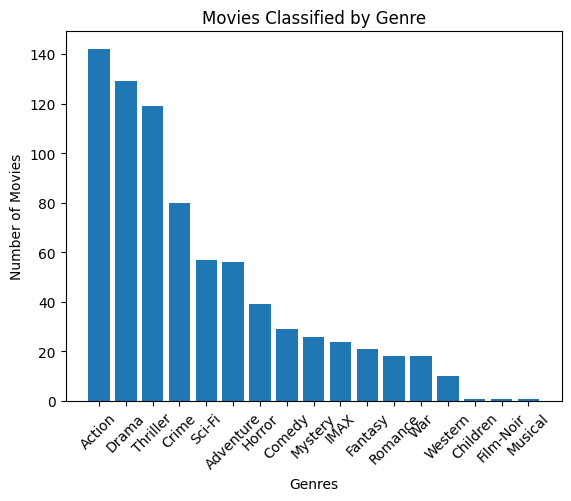

In [39]:
from movifex.datasets.movifex.visualizer_metadata import visualizeGenresDictionary

print(f"- Visualizing the classification results in a bar chart ...")
visualizeGenresDictionary(moviesByGenre)